In [89]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.neighbors import LocalOutlierFactor

In [90]:
# Importing the dataset
path = os.getcwd()
path = path + "\\star_classification.csv"

dataset = pd.read_csv(path)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [91]:
# Changing class from string to int
dataset['class'] = [1 if i == "GALAXY" else 2 if i == "STAR" else 3 for i in dataset["class"]]
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  int64  
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(8)


In [92]:
# Count of each class
class_counts = dataset["class"].value_counts()
print(class_counts)

class
1    59445
2    21594
3    18961
Name: count, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_4280\4053954700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=dataset, palette="Set2")


<Axes: xlabel='class', ylabel='count'>

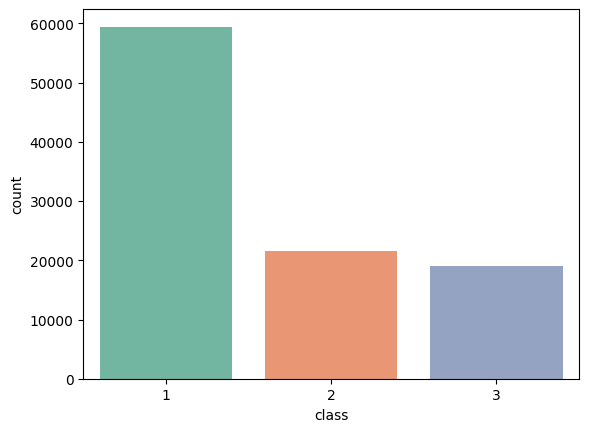

In [93]:
# Plotting the count of each class
sns.countplot(x="class", data=dataset, palette="Set2")

In [94]:
# Detecting outliers
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(dataset) 

In [95]:
# Calculate the outlier scores
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

In [96]:
# Calculate the mean and standard deviation of the LOF scores
mean = np.mean(clf.negative_outlier_factor_)
std = np.std(clf.negative_outlier_factor_)

# Define the threshold for outliers
threshold = mean - 0.5 * std

# Detect outliers
outliers = dataset[clf.negative_outlier_factor_ < threshold]

In [97]:
#Drop outliers
dataset = dataset.drop(outliers.index)

In [98]:
# Calculate the threshold
#threshold = np.percentile(clf.negative_outlier_factor_, 10)

# Detect outliers
#outliers2 = dataset[clf.negative_outlier_factor_ < threshold]

In [99]:
#from scipy.spatial import distance
# Calculate the mean and covariance of the dataset
#mean = np.mean(dataset, axis=0)
#cov = np.cov(dataset, rowvar=0)

# Calculate the Mahalanobis distance of each point
#mahalanobis_dist = np.apply_along_axis(lambda x: distance.mahalanobis(x, mean, np.linalg.inv(cov)), 1, dataset)

# Define the threshold for outliers
#threshold = np.mean(mahalanobis_dist) * 2  # For example, two times the mean

# Detect outliers
#outliers = dataset[mahalanobis_dist > threshold]

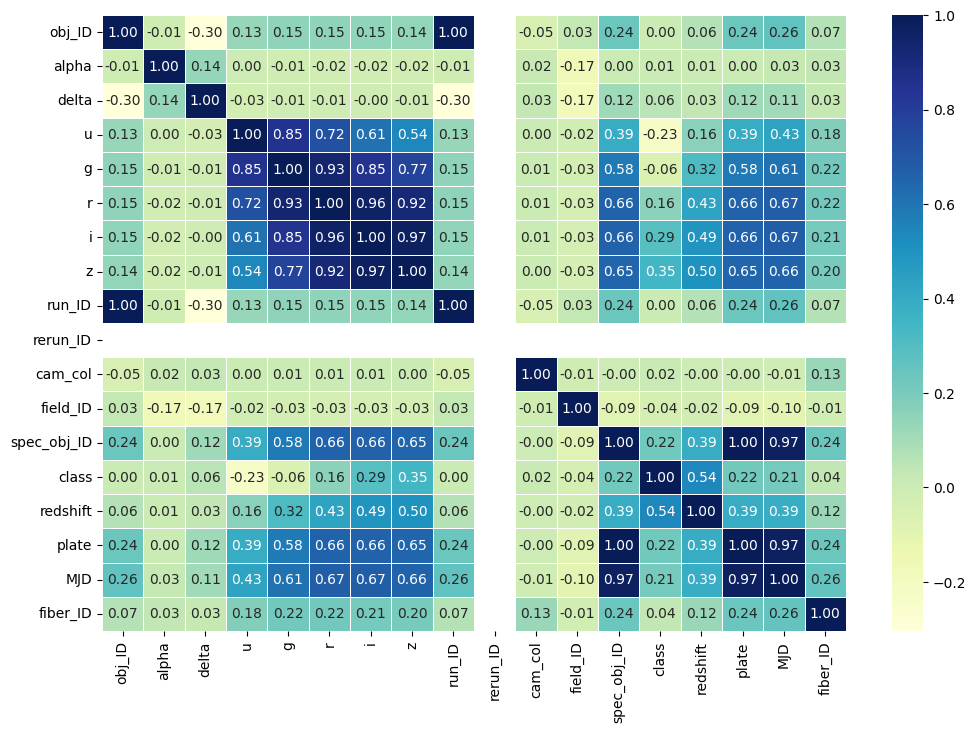

In [100]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [101]:
print(dataset["rerun_ID"].nunique())
print(len(dataset["obj_ID"]))

1
91901


In [102]:
correlation = dataset.corr()
correlation["class"].sort_values(ascending=False)

class          1.000000
redshift       0.540993
z              0.346822
i              0.290627
plate          0.221814
spec_obj_ID    0.221813
MJD            0.211807
r              0.156583
delta          0.057513
fiber_ID       0.035436
cam_col        0.016253
alpha          0.006724
obj_ID         0.002229
run_ID         0.002228
field_ID      -0.037470
g             -0.062751
u             -0.226211
rerun_ID            NaN
Name: class, dtype: float64

In [103]:
# Dropping uneccessary features
dataset = dataset.drop(["rerun_ID"], axis=1)
dataset.info()

#dataset3 = dataset2.drop(["MJD","spec_obj_ID","i","r",""], axis=1)
#dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91901 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       91901 non-null  float64
 1   alpha        91901 non-null  float64
 2   delta        91901 non-null  float64
 3   u            91901 non-null  float64
 4   g            91901 non-null  float64
 5   r            91901 non-null  float64
 6   i            91901 non-null  float64
 7   z            91901 non-null  float64
 8   run_ID       91901 non-null  int64  
 9   cam_col      91901 non-null  int64  
 10  field_ID     91901 non-null  int64  
 11  spec_obj_ID  91901 non-null  float64
 12  class        91901 non-null  int64  
 13  redshift     91901 non-null  float64
 14  plate        91901 non-null  int64  
 15  MJD          91901 non-null  int64  
 16  fiber_ID     91901 non-null  int64  
dtypes: float64(10), int64(7)
memory usage: 12.6 MB


In [104]:
dataset2 = dataset.drop(["obj_ID","run_ID","field_ID","fiber_ID","cam_col"], axis=1)
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91901 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alpha        91901 non-null  float64
 1   delta        91901 non-null  float64
 2   u            91901 non-null  float64
 3   g            91901 non-null  float64
 4   r            91901 non-null  float64
 5   i            91901 non-null  float64
 6   z            91901 non-null  float64
 7   spec_obj_ID  91901 non-null  float64
 8   class        91901 non-null  int64  
 9   redshift     91901 non-null  float64
 10  plate        91901 non-null  int64  
 11  MJD          91901 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 9.1 MB


In [105]:
dataset3 = dataset2.drop(["alpha", "delta"], axis=1)
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91901 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   u            91901 non-null  float64
 1   g            91901 non-null  float64
 2   r            91901 non-null  float64
 3   i            91901 non-null  float64
 4   z            91901 non-null  float64
 5   spec_obj_ID  91901 non-null  float64
 6   class        91901 non-null  int64  
 7   redshift     91901 non-null  float64
 8   plate        91901 non-null  int64  
 9   MJD          91901 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 7.7 MB
